In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# KOSPI

## 1. 파일 불러오기

In [ ]:
# 파일 불러오기
from google.colab import files
up = files.upload()

Saving KOSPI_PSR포함(수정).xlsx to KOSPI_PSR포함(수정).xlsx
Saving KOSPI_코드매칭.xlsx to KOSPI_코드매칭.xlsx
Saving KOSPICash.xlsx to KOSPICash.xlsx


## 2. Data 불러오기
1. df_kospi
2. df_kospi_code
3. df_kospi_cash

In [ ]:
# df_kospi 생성
df_kospi = pd.read_excel("KOSPI_PSR포함(수정).xlsx")
df_kospi.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR
0,삼성전자,4351971,2796048.0,12.62,13.92,9.92,1.67,1.556472
1,SK하이닉스,939123,319004.0,11.66,9.53,6.98,1.51,2.943922
2,NAVER,533980,53041.0,3.22,15.22,5.77,2.05,10.067306
3,카카오,430799,41568.0,38.03,2.70,1.68,4.76,10.363717
4,LG화학,393905,300765.0,14.54,2.93,1.81,2.04,1.309677


In [ ]:
# df_kospi_code 생성
df_kospi_code = pd.read_excel("KOSPI_코드매칭.xlsx")
df_kospi_code.head()

,Unnamed: 0,종목명,종목코드
0,0,삼성전자,5930
1,1,SK하이닉스,660
2,2,NAVER,35420
3,3,카카오,35720
4,4,LG화학,51910


In [ ]:
# df_kospi_cash 생성
df_kospi_cash = pd.read_excel("KOSPICash.xlsx")
df_kospi_cash.head()

,종목명,현금흐름
0,삼성전자,651054.5
1,SK하이닉스,123145.7
2,NAVER,14472.1
3,카카오,9711.0
4,LG화학,58408.3


In [ ]:
# df_kospi : data type 확인
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     787 non-null    object 
 1   시가총액    787 non-null    int64  
 2   매출액     786 non-null    float64
 3   PER     787 non-null    float64
 4   ROE     787 non-null    float64
 5   ROA     787 non-null    float64
 6   PBR     787 non-null    float64
 7   PSR     786 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 49.3+ KB


In [ ]:
# df_kospi : 결측치 확인
df_kospi.isna().sum()

종목명     0
시가총액    0
매출액     1
PER     0
ROE     0
ROA     0
PBR     0
PSR     1
dtype: int64

In [ ]:
# df_kospi_code : data type 확인
df_kospi_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  787 non-null    int64 
 1   종목명         787 non-null    object
 2   종목코드        787 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.6+ KB


In [ ]:
# df_kospi_code : 결측치 확인
df_kospi_code.isna().sum()

Unnamed: 0    0
종목명           0
종목코드          0
dtype: int64

In [ ]:
# df_kospi_cash : data type 확인
df_kospi_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     787 non-null    object 
 1   현금흐름    787 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
# df_kospi_cash : 결측치 확인
df_kospi_cash.isna().sum()

종목명     0
현금흐름    0
dtype: int64

## 3. 종목명 기준으로 데이터프레임 합치기

In [ ]:
# 종목명 기준으로 df_kospi와 df_kospi_code 합치기
df_kospi_merge = pd.merge(df_kospi, df_kospi_code, how='outer', on='종목명')
df_kospi_merge.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,Unnamed: 0,종목코드
0,삼성전자,4351971,2796048.0,12.62,13.92,9.92,1.67,1.556472,0,5930
1,SK하이닉스,939123,319004.0,11.66,9.53,6.98,1.51,2.943922,1,660
2,NAVER,533980,53041.0,3.22,15.22,5.77,2.05,10.067306,2,35420
3,카카오,430799,41568.0,38.03,2.70,1.68,4.76,10.363717,3,35720
4,LG화학,393905,300765.0,14.54,2.93,1.81,2.04,1.309677,4,51910


In [ ]:
# 종목명 기준으로 df_kospi_merge와 df_kospi_cash 합치기
df_kospi_merge_cash = pd.merge(df_kospi_merge, df_kospi_cash, how='outer', on='종목명')
df_kospi_merge_cash.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,Unnamed: 0,종목코드,현금흐름
0,삼성전자,4351971,2796048.0,12.62,13.92,9.92,1.67,1.556472,0,5930,651054.5
1,SK하이닉스,939123,319004.0,11.66,9.53,6.98,1.51,2.943922,1,660,123145.7
2,NAVER,533980,53041.0,3.22,15.22,5.77,2.05,10.067306,2,35420,14472.1
3,카카오,430799,41568.0,38.03,2.70,1.68,4.76,10.363717,3,35720,9711.0
4,LG화학,393905,300765.0,14.54,2.93,1.81,2.04,1.309677,4,51910,58408.3


In [ ]:
# 'Unnamed: 0' 컬럼 삭제
df_kospi_merge_cash.drop(['Unnamed: 0'], axis=1, inplace=True)
df_kospi_merge_cash.head() 

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드,현금흐름
0,삼성전자,4351971,2796048.0,12.62,13.92,9.92,1.67,1.556472,5930,651054.5
1,SK하이닉스,939123,319004.0,11.66,9.53,6.98,1.51,2.943922,660,123145.7
2,NAVER,533980,53041.0,3.22,15.22,5.77,2.05,10.067306,35420,14472.1
3,카카오,430799,41568.0,38.03,2.70,1.68,4.76,10.363717,35720,9711.0
4,LG화학,393905,300765.0,14.54,2.93,1.81,2.04,1.309677,51910,58408.3


## 4. 데이터 타입 변경

In [ ]:
# 종목코드 data type 변경 : int64 -> string
df_kospi_merge_cash = df_kospi_merge_cash.astype({"종목코드":"string"})
df_kospi_merge_cash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 786
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     787 non-null    object 
 1   시가총액    787 non-null    int64  
 2   매출액     786 non-null    float64
 3   PER     787 non-null    float64
 4   ROE     787 non-null    float64
 5   ROA     787 non-null    float64
 6   PBR     787 non-null    float64
 7   PSR     786 non-null    float64
 8   종목코드    787 non-null    string 
 9   현금흐름    787 non-null    float64
dtypes: float64(7), int64(1), object(1), string(1)
memory usage: 67.6+ KB


In [ ]:
df_kospi_merge_cash.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드,현금흐름
0,삼성전자,4351971,2796048.0,12.62,13.92,9.92,1.67,1.556472,5930,651054.5
1,SK하이닉스,939123,319004.0,11.66,9.53,6.98,1.51,2.943922,660,123145.7
2,NAVER,533980,53041.0,3.22,15.22,5.77,2.05,10.067306,35420,14472.1
3,카카오,430799,41568.0,38.03,2.70,1.68,4.76,10.363717,35720,9711.0
4,LG화학,393905,300765.0,14.54,2.93,1.81,2.04,1.309677,51910,58408.3


In [ ]:
# 병합된 데이터 프레임의 결측치 확인 : '매출액' -> 1, 'PSR' -> 1
df_kospi_merge_cash.isna().sum()

종목명     0
시가총액    0
매출액     1
PER     0
ROE     0
ROA     0
PBR     0
PSR     1
종목코드    0
현금흐름    0
dtype: int64

In [ ]:
# 결측치 해당 항목 확인
df_kospi_merge_cash.loc[df_kospi_merge_cash["매출액"].isna()]

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드,현금흐름
218,프레스티지바이오파마,8834,NaN,-27.32,-1.78,-1.67,1.53,NaN,950210,-154.5


In [ ]:
df_kospi_merge_cash = df_kospi_merge_cash.fillna(0)
df_kospi_merge_cash.isna().sum()

종목명     0
시가총액    0
매출액     0
PER     0
ROE     0
ROA     0
PBR     0
PSR     0
종목코드    0
현금흐름    0
dtype: int64

## 5. 종목코드 수정

In [ ]:
# '삼성전자'의 종목코드 확인
df_kospi_merge_cash.iloc[0:1, -2][0]

'5930'

In [ ]:
df_kospi = df_kospi_merge_cash.copy()

In [ ]:
# 종목코드의 길이가 6이 아닐 경우, 앞에 0 추가
for i in range(7):
    df_kospi["종목코드"] = df_kospi["종목코드"].str.zfill(i)
df_kospi.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드,현금흐름
0,삼성전자,4351971,2796048.0,12.62,13.92,9.92,1.67,1.556472,005930,651054.5
1,SK하이닉스,939123,319004.0,11.66,9.53,6.98,1.51,2.943922,000660,123145.7
2,NAVER,533980,53041.0,3.22,15.22,5.77,2.05,10.067306,035420,14472.1
3,카카오,430799,41568.0,38.03,2.70,1.68,4.76,10.363717,035720,9711.0
4,LG화학,393905,300765.0,14.54,2.93,1.81,2.04,1.309677,051910,58408.3


## 6. 컬럼 순서 변경

In [ ]:
# col의 인덱스 변경
col = df_kospi.columns.to_numpy()
col

array(['종목명', '시가총액', '매출액', 'PER', 'ROE', 'ROA', 'PBR', 'PSR', '종목코드',
       '현금흐름'], dtype=object)

In [ ]:
col = col[[0,8,1,2,9,3,4,5,6,7]]
col

array(['종목명', '종목코드', '시가총액', '매출액', '현금흐름', 'PER', 'ROE', 'ROA', 'PBR',
       'PSR'], dtype=object)

In [ ]:
df_kospi = df_kospi[col]
df_kospi

,종목명,종목코드,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR
0,삼성전자,005930,4351971,2796048.0,651054.5,12.62,13.92,9.92,1.67,1.556472
1,SK하이닉스,000660,939123,319004.0,123145.7,11.66,9.53,6.98,1.51,2.943922
2,NAVER,035420,533980,53041.0,14472.1,3.22,15.22,5.77,2.05,10.067306
3,카카오,035720,430799,41568.0,9711.0,38.03,2.70,1.68,4.76,10.363717
4,LG화학,051910,393905,300765.0,58408.3,14.54,2.93,1.81,2.04,1.309677
...,...,...,...,...,...,...,...,...,...,...
782,체시스,033250,336,429.0,73.2,-17.50,-8.25,-2.84,1.10,0.783217
783,코아스,071950,334,982.0,20.2,-20.77,-6.81,-2.32,1.48,0.340122
784,다이나믹디자인,145210,323,768.0,-108.3,-0.76,-90.21,-24.63,0.54,0.420573
785,부산주공,005030,321,1527.0,-67.5,-3.72,-47.39,-5.05,1.26,0.210216


- 컬럼 추가

In [ ]:
df_kospi["PCR"] = df_kospi.apply(lambda x: x["시가총액"] / x["현금흐름"], axis=1)
df_kospi.head()

,종목명,종목코드,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR,PCR
0,삼성전자,005930,4351971,2796048.0,651054.5,12.62,13.92,9.92,1.67,1.556472,6.684496
1,SK하이닉스,000660,939123,319004.0,123145.7,11.66,9.53,6.98,1.51,2.943922,7.626113
2,NAVER,035420,533980,53041.0,14472.1,3.22,15.22,5.77,2.05,10.067306,36.897202
3,카카오,035720,430799,41568.0,9711.0,38.03,2.70,1.68,4.76,10.363717,44.361961
4,LG화학,051910,393905,300765.0,58408.3,14.54,2.93,1.81,2.04,1.309677,6.743990


In [ ]:
# excel로 파일 다운로드 확인
# df_kospi.to_excel("KOSPI_완료.xlsx")

## 7. 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


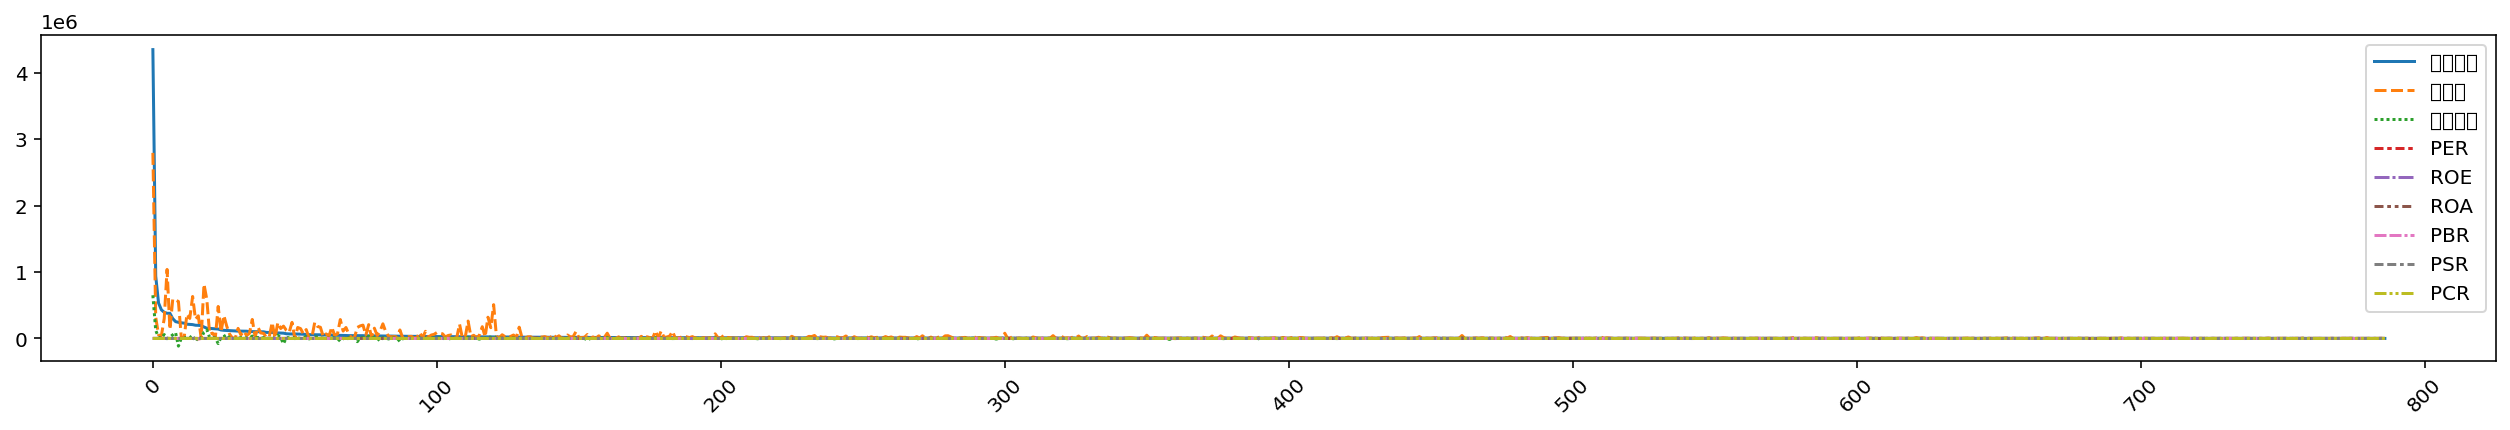

---------------

# KOSDAQ

## 3. `df_kosdaq`, `df_kosdaq_code`

In [ ]:
# df_kosdaq 생성
df_kosdaq = pd.read_excel("KOSDAQ0304.xlsx")
df_kosdaq.head()

,Unnamed: 0,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드
0,0,셀트리온헬스케어,104821,16276,63.77,13.36,7.30,5.22,6.440219,91990
1,1,엘앤에프,71013,3561,-181.01,-9.39,-3.40,9.04,19.941870,66970
2,2,펄어비스,67281,4888,130.26,16.45,11.43,8.68,13.764525,263750
3,3,카카오게임즈,58739,4955,58.06,12.12,7.10,3.97,11.854490,293490
4,4,위메이드,36461,1262,67.75,-3.00,-5.93,12.15,28.891442,112040


In [ ]:
# df_kosdaq data type, NaN값 확인
df_kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1435 non-null   int64  
 1   종목명         1435 non-null   object 
 2   시가총액        1435 non-null   int64  
 3   매출액         1435 non-null   int64  
 4   PER         1435 non-null   float64
 5   ROE         1435 non-null   float64
 6   ROA         1435 non-null   float64
 7   PBR         1435 non-null   float64
 8   PSR         1435 non-null   float64
 9   종목코드        1435 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 112.2+ KB


In [ ]:
df_kosdaq.isna().sum()

Unnamed: 0    0
종목명           0
시가총액          0
매출액           0
PER           0
ROE           0
ROA           0
PBR           0
PSR           0
종목코드          0
dtype: int64

In [ ]:
# df_kosdaq_code
df_kosdaq_code = pd.read_excel("KOSDAQ_코드매칭.xlsx")
df_kosdaq_code.head()

,Unnamed: 0,종목명,종목코드
0,0,셀트리온헬스케어,91990
1,1,엘앤에프,66970
2,2,펄어비스,263750
3,3,카카오게임즈,293490
4,4,위메이드,112040


In [ ]:
# df_kosdaq_cash 확인

- 종목명 기준으로 데이터프레임 합치기

In [ ]:
# 종목명 기준으로 df_kosdaq와 df_kosdaq_code 합치기
df_kosdaq_merge = pd.merge(df_kosdaq, df_kosdaq_code, how="outer", on="종목명")
df_kosdaq_merge.head()

,Unnamed: 0_x,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드_x,Unnamed: 0_y,종목코드_y
0,0,셀트리온헬스케어,104821,16276,63.77,13.36,7.30,5.22,6.440219,91990,0,91990
1,1,엘앤에프,71013,3561,-181.01,-9.39,-3.40,9.04,19.941870,66970,1,66970
2,2,펄어비스,67281,4888,130.26,16.45,11.43,8.68,13.764525,263750,2,263750
3,3,카카오게임즈,58739,4955,58.06,12.12,7.10,3.97,11.854490,293490,3,293490
4,4,위메이드,36461,1262,67.75,-3.00,-5.93,12.15,28.891442,112040,4,112040


In [ ]:
# 'Unnamed: 0_x', 'Unnamed: 0_y' 컬럼 삭제
df_kosdaq_merge.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)
df_kosdaq_merge

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드_x,종목코드_y
0,셀트리온헬스케어,104821,16276,63.77,13.36,7.30,5.22,6.440219,91990,91990
1,엘앤에프,71013,3561,-181.01,-9.39,-3.40,9.04,19.941870,66970,66970
2,펄어비스,67281,4888,130.26,16.45,11.43,8.68,13.764525,263750,263750
3,카카오게임즈,58739,4955,58.06,12.12,7.10,3.97,11.854490,293490,293490
4,위메이드,36461,1262,67.75,-3.00,-5.93,12.15,28.891442,112040,112040
...,...,...,...,...,...,...,...,...,...,...
1430,제이웨이,78,111,-0.62,-159.36,-87.01,12.05,0.702703,58420,58420
1431,신영스팩5호,74,0,353.33,-0.17,-0.15,1.08,0.000000,323280,323280
1432,에스디시스템,71,228,5.13,-34.16,-11.41,0.91,0.311404,121890,121890
1433,IBKS제12호스팩,66,0,-213.00,-0.52,-0.43,1.12,0.000000,335870,335870


In [ ]:
df_kosdaq_merge.rename(columns={"종목코드_x":"종목코드"}, inplace=True)
df_kosdaq_merge.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드,종목코드_y
0,셀트리온헬스케어,104821,16276,63.77,13.36,7.30,5.22,6.440219,91990,91990
1,엘앤에프,71013,3561,-181.01,-9.39,-3.40,9.04,19.941870,66970,66970
2,펄어비스,67281,4888,130.26,16.45,11.43,8.68,13.764525,263750,263750
3,카카오게임즈,58739,4955,58.06,12.12,7.10,3.97,11.854490,293490,293490
4,위메이드,36461,1262,67.75,-3.00,-5.93,12.15,28.891442,112040,112040


In [ ]:
df_kosdaq_merge.drop(["종목코드_y"], inplace=True, axis=1)
df_kosdaq_merge.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드
0,셀트리온헬스케어,104821,16276,63.77,13.36,7.30,5.22,6.440219,91990
1,엘앤에프,71013,3561,-181.01,-9.39,-3.40,9.04,19.941870,66970
2,펄어비스,67281,4888,130.26,16.45,11.43,8.68,13.764525,263750
3,카카오게임즈,58739,4955,58.06,12.12,7.10,3.97,11.854490,293490
4,위메이드,36461,1262,67.75,-3.00,-5.93,12.15,28.891442,112040


- 데이터 타입 변경

In [ ]:
# 종목코드 data type 변경 : int64 -> string
df_kosdaq_merge = df_kosdaq_merge.astype({"종목코드":"string"})
df_kosdaq_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     1435 non-null   object 
 1   시가총액    1435 non-null   int64  
 2   매출액     1435 non-null   int64  
 3   PER     1435 non-null   float64
 4   ROE     1435 non-null   float64
 5   ROA     1435 non-null   float64
 6   PBR     1435 non-null   float64
 7   PSR     1435 non-null   float64
 8   종목코드    1435 non-null   string 
dtypes: float64(5), int64(2), object(1), string(1)
memory usage: 144.4+ KB


In [ ]:
df_kosdaq_merge.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드
0,셀트리온헬스케어,104821,16276,63.77,13.36,7.30,5.22,6.440219,91990
1,엘앤에프,71013,3561,-181.01,-9.39,-3.40,9.04,19.941870,66970
2,펄어비스,67281,4888,130.26,16.45,11.43,8.68,13.764525,263750
3,카카오게임즈,58739,4955,58.06,12.12,7.10,3.97,11.854490,293490
4,위메이드,36461,1262,67.75,-3.00,-5.93,12.15,28.891442,112040


In [ ]:
df_kosdaq_merge.isna().sum()

종목명     0
시가총액    0
매출액     0
PER     0
ROE     0
ROA     0
PBR     0
PSR     0
종목코드    0
dtype: int64

In [ ]:
# 병합된 데이터 프레임의 결측치 확인
df_kosdaq_merge.isna().sum()

종목명     0
시가총액    0
매출액     0
PER     0
ROE     0
ROA     0
PBR     0
PSR     0
종목코드    0
dtype: int64

- 종목코드 수정

In [ ]:
# '셀트리온헬스케어'의 종목코드 확인 : 종목코드의 길이가 6이 아닐 경우, 앞에 0 추가
df_kosdaq_merge.iloc[0:1, -1][0]

'91990'

In [ ]:
df_kosdaq = df_kosdaq_merge.copy()

In [ ]:
# 종목코드의 길이가 6이 아닐 경우, 앞에 0 추가
for i in range(7):
    df_kosdaq["종목코드"] = df_kosdaq["종목코드"].str.zfill(i)
df_kosdaq.head()

,종목명,시가총액,매출액,PER,ROE,ROA,PBR,PSR,종목코드
0,셀트리온헬스케어,104821,16276,63.77,13.36,7.30,5.22,6.440219,091990
1,엘앤에프,71013,3561,-181.01,-9.39,-3.40,9.04,19.941870,066970
2,펄어비스,67281,4888,130.26,16.45,11.43,8.68,13.764525,263750
3,카카오게임즈,58739,4955,58.06,12.12,7.10,3.97,11.854490,293490
4,위메이드,36461,1262,67.75,-3.00,-5.93,12.15,28.891442,112040


In [ ]:
df_kosdaq.isna().sum()

종목명     0
시가총액    0
매출액     0
PER     0
ROE     0
ROA     0
PBR     0
PSR     0
종목코드    0
dtype: int64

In [ ]:
# df_kosdaq.to_excel("DF_KOSDAQ.xlsx")